<a href="https://colab.research.google.com/github/peterbabulik/D-D-AI-locally/blob/main/theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.8 MB/s eta 0:00:00



===== SIMULATING 1D QW with CA Rule 30 Substrate =====
Using CA Rule 30 pattern (first 30 sites): [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0]
Starting QW evolution on CA Rule 30 substrate...
  QW Step 20/100, S=0.7982
  QW Step 40/100, S=0.7474
  QW Step 60/100, S=0.6234
  QW Step 80/100, S=0.6640
  QW Step 100/100, S=0.9082
QW Evolution complete. Time: 0.98s

    **Theoretical Interpretation (CA Rule 30 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker also has a position state `|x⟩`. The full state of the walker is `|coin⟩⊗|position⟩`.
        - The initial state `ψ_initial` is `|coin=0⟩⊗|pos=50⟩`, a simple, localized informat

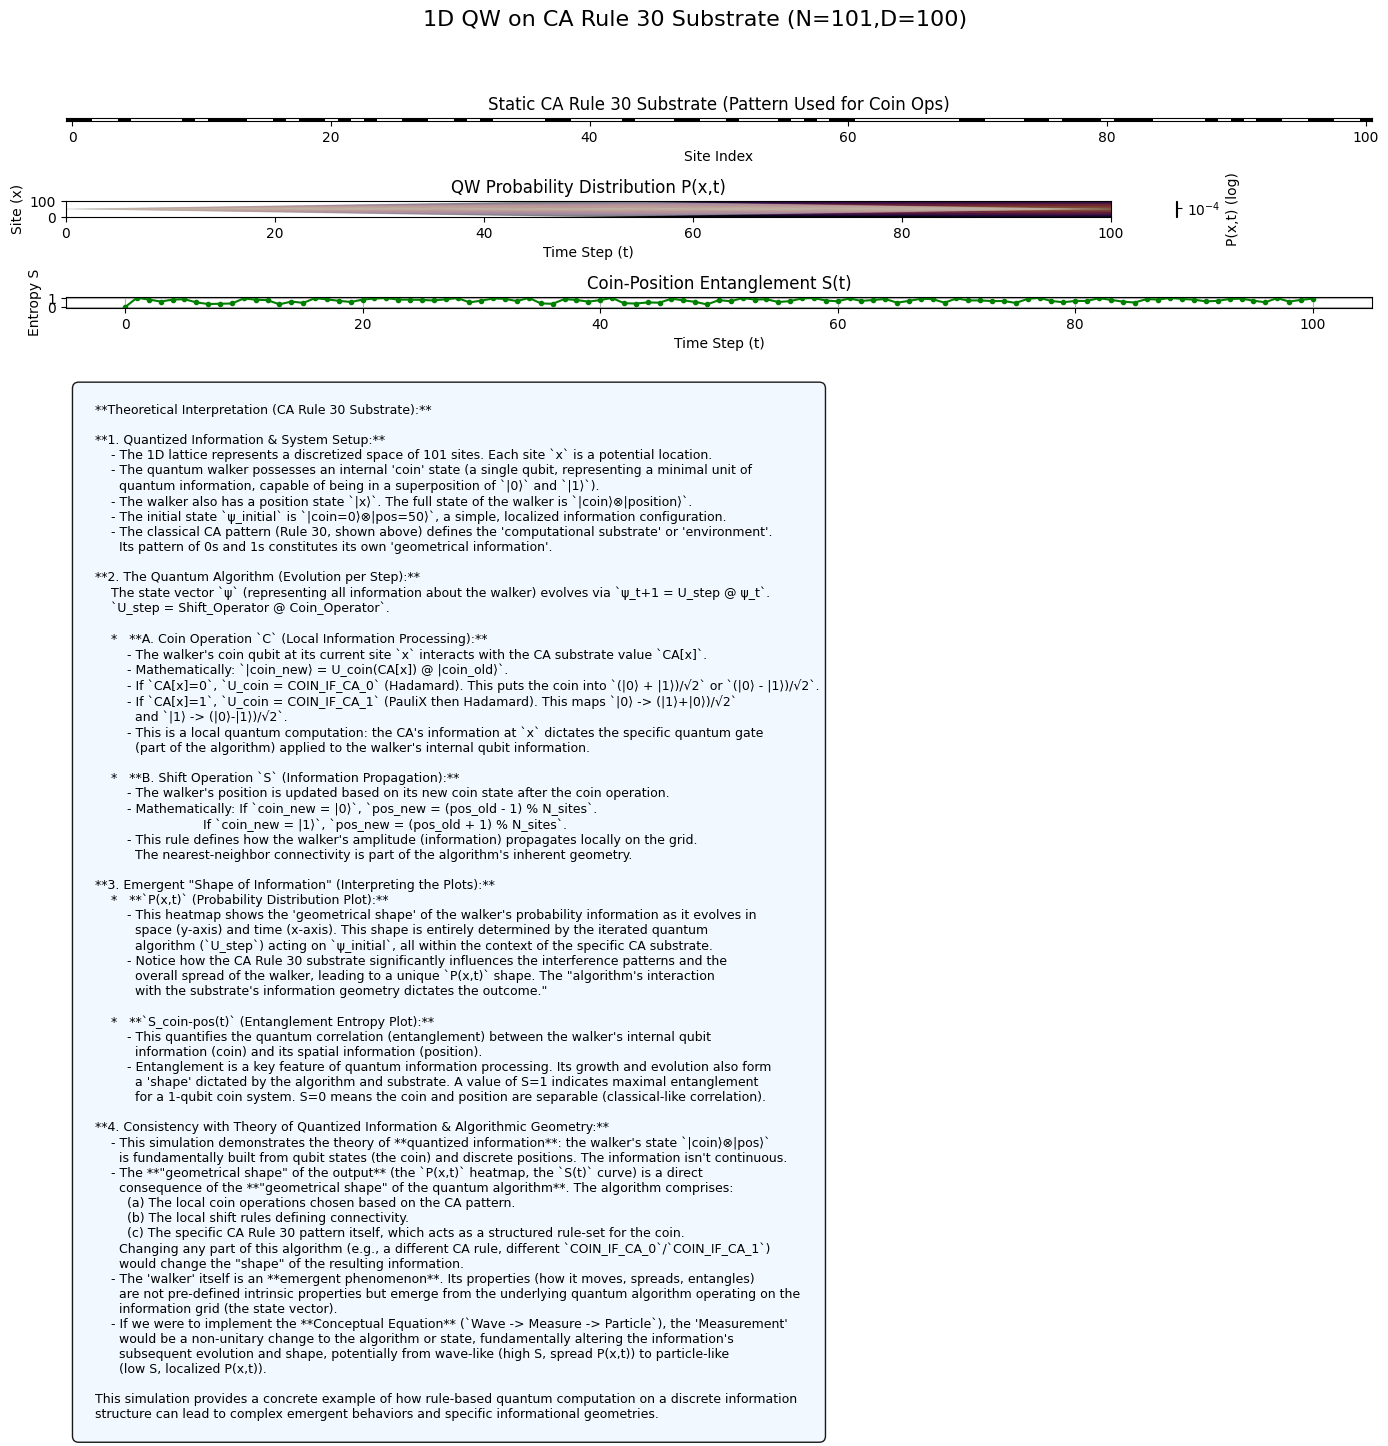


===== SIMULATING 1D QW with CA Rule 90 Substrate =====
Using CA Rule 90 pattern (first 30 sites): [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Starting QW evolution on CA Rule 90 substrate...
  QW Step 20/100, S=0.7732
  QW Step 40/100, S=0.9835
  QW Step 60/100, S=0.9796
  QW Step 80/100, S=0.9897
  QW Step 100/100, S=0.9904
QW Evolution complete. Time: 0.26s

    **Theoretical Interpretation (CA Rule 90 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker also has a position state `|x⟩`. The full state of the walker is `|coin⟩⊗|position⟩`.
        - The initial state `ψ_initial` is `|coin=0⟩⊗|pos=50⟩`, a simple, localized informat

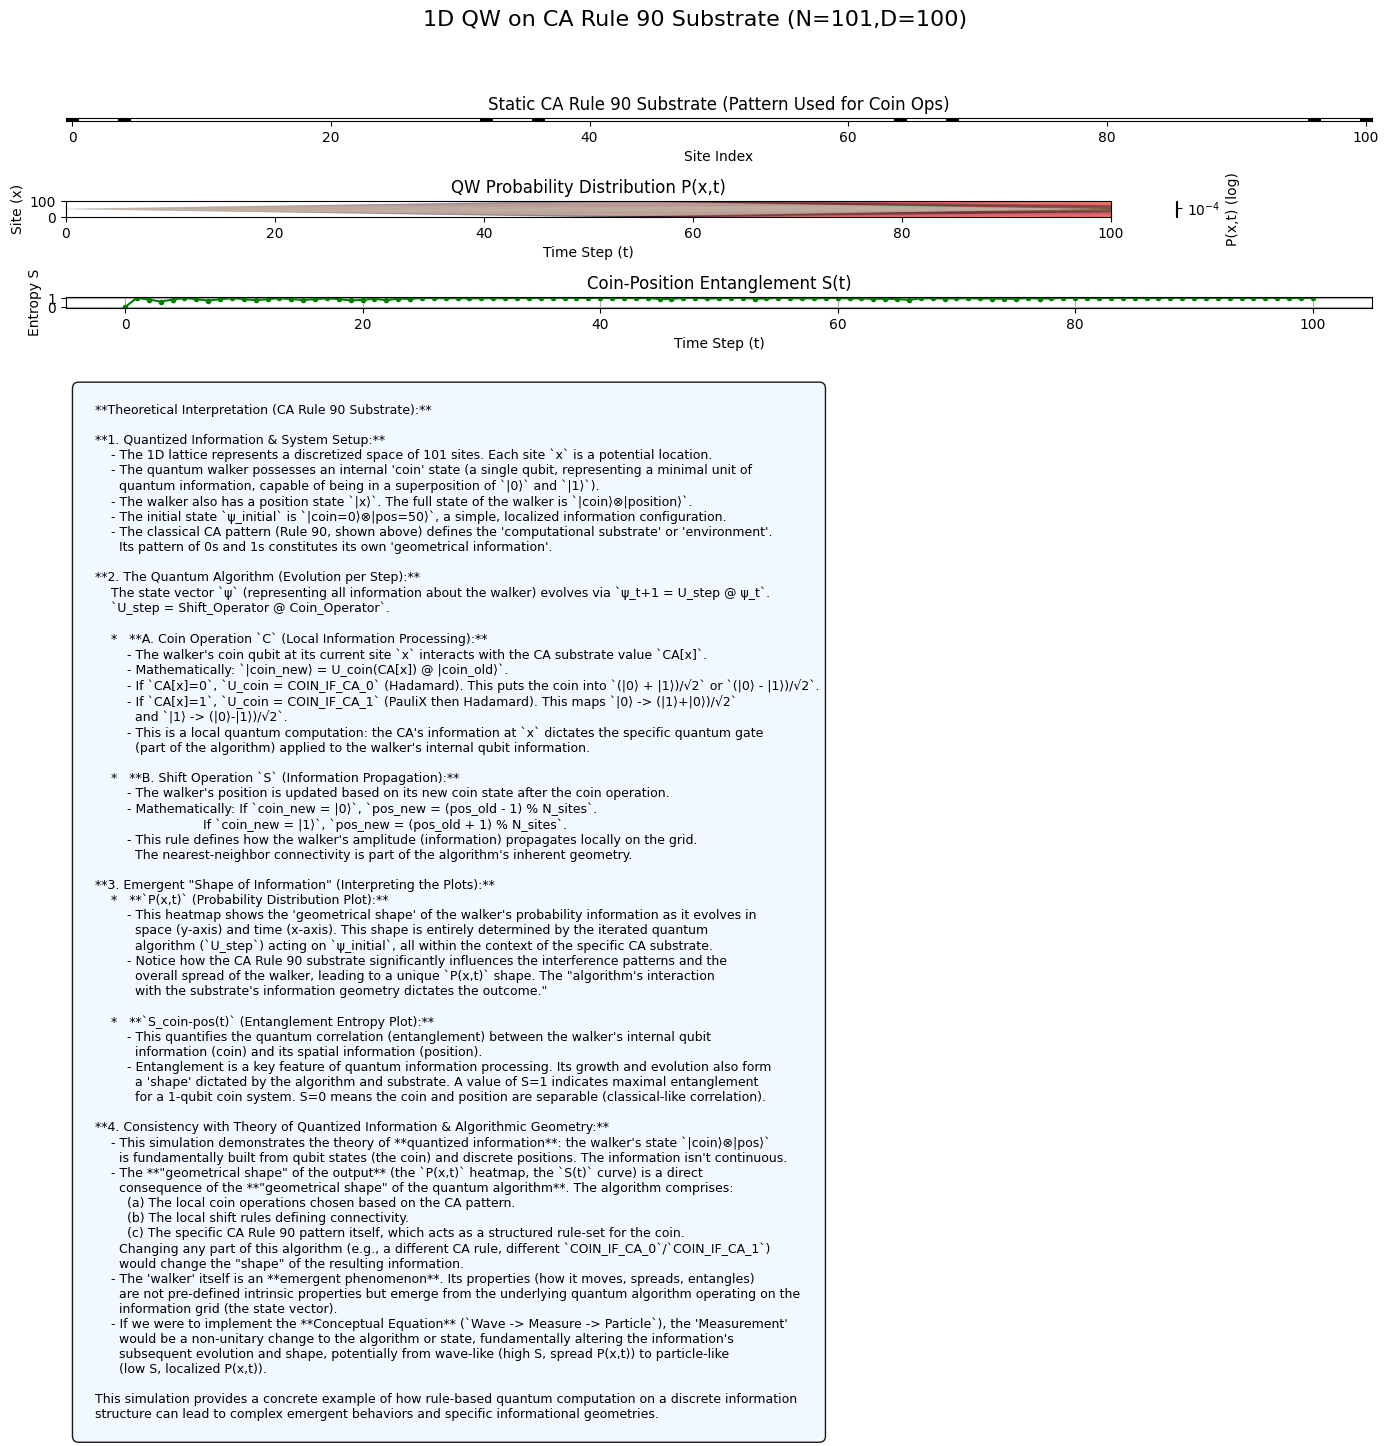


===== SIMULATING 1D QW with CA Rule 110 Substrate =====
Using CA Rule 110 pattern (first 30 sites): [1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1]
Starting QW evolution on CA Rule 110 substrate...
  QW Step 20/100, S=0.4350
  QW Step 40/100, S=0.3873
  QW Step 60/100, S=0.3882
  QW Step 80/100, S=0.7377
  QW Step 100/100, S=0.7213
QW Evolution complete. Time: 0.27s

    **Theoretical Interpretation (CA Rule 110 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker also has a position state `|x⟩`. The full state of the walker is `|coin⟩⊗|position⟩`.
        - The initial state `ψ_initial` is `|coin=0⟩⊗|pos=50⟩`, a simple, localized info

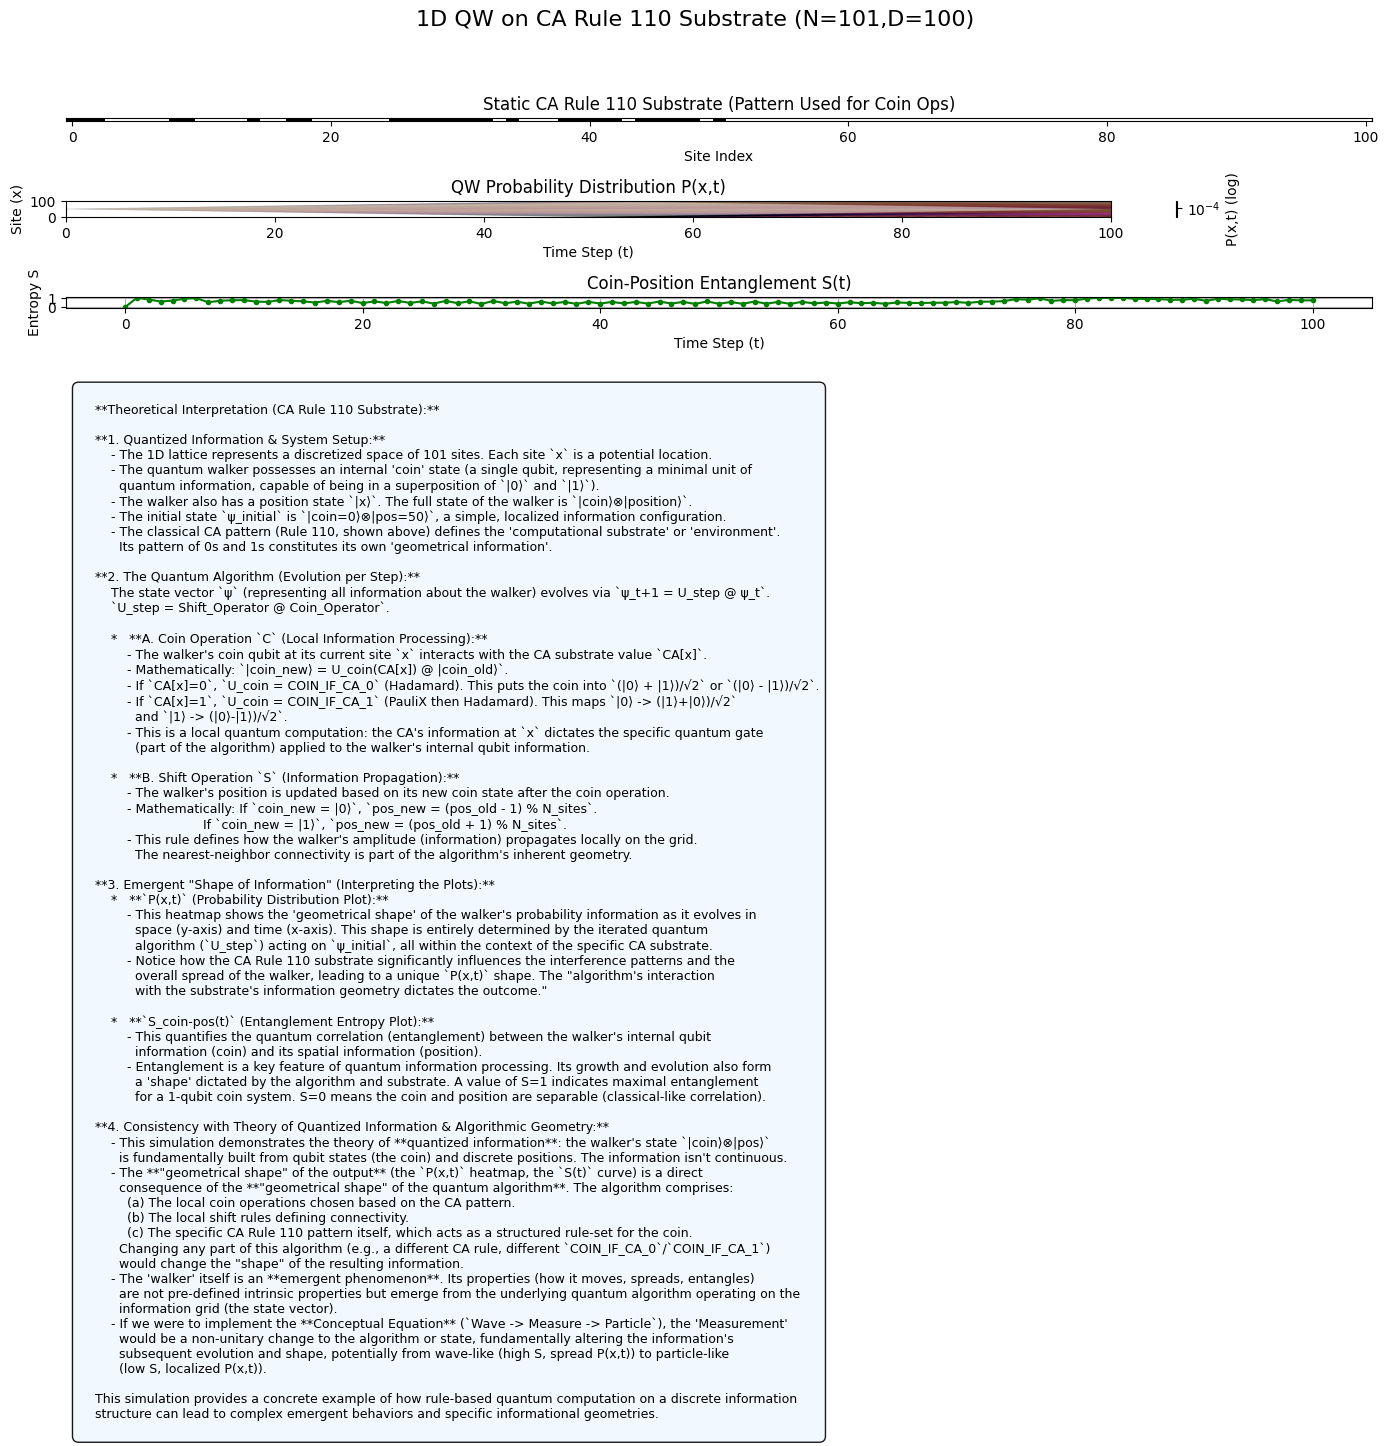


<<<<< END OF 1D QW CA SUBSTRATE SIMULATIONS >>>>>


In [3]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors # Ensure this is imported
import time
import zlib

# --- Parameters ---
N_SITES_1D = 101
DEPTH = 100 # Enough steps to see evolution
INITIAL_POS_1D = N_SITES_1D // 2
INITIAL_COIN_1D = 0
INITIAL_CA_CENTER_ONE = True # For CA initialization

# --- CA Rule Update Function ---
def update_ca_line(current_line, rule_number):
    width = len(current_line); new_line = np.zeros(width, dtype=int)
    for i in range(width):
        pattern_val = (current_line[(i-1+width)%width]<<2)|(current_line[i]<<1)|current_line[(i+1)%width]
        if rule_number==30: new_line[i]=1 if pattern_val in [1,2,3,4] else 0
        elif rule_number==90: new_line[i]=1 if current_line[(i-1+width)%width]!=current_line[(i+1)%width] else 0
        elif rule_number==110: new_line[i]=1 if pattern_val in [1,2,3,5,6] else 0
        else: raise ValueError(f"Rule {rule_number} not implemented.")
    return new_line

def generate_ca_pattern_history(width, steps, rule_number, initial_center_one=True):
    line = np.zeros(width, dtype=int)
    if initial_center_one and width > 0:
        center_idx = width // 2
        if width % 2 == 1: line[center_idx] = 1
        else: line[center_idx - 1] = 1

    history = [line.copy()]
    for _ in range(steps): # Evolve for 'steps' generations (total steps+1 patterns including initial)
        line = update_ca_line(line, rule_number)
        history.append(line.copy())
    return np.array(history)


# --- Coin Matrices ---
H_1Q = (1/np.sqrt(2))*np.array([[1,1],[1,-1]],dtype=np.complex128)
X_1Q = np.array([[0,1],[1,0]],dtype=np.complex128)
I_1Q = np.eye(2,dtype=np.complex128)
# Define the coin operations that will be selected based on CA state
# These are the "Rules" for the quantum part of the algorithm at each site
COIN_IF_CA_0 = H_1Q
COIN_IF_CA_1 = X_1Q @ H_1Q

# --- Helper Functions (1D QW) ---
def get_1d_index(coin_val, site_pos, n_sites_1d):
    if not (0 <= site_pos < n_sites_1d and 0 <= coin_val <= 1):
        raise IndexError(f"Invalid coin ({coin_val}) or pos ({site_pos}) for 1D (N={n_sites_1d})")
    return coin_val + 2 * site_pos

def get_1d_coin_pos_from_index(k, n_sites_1d):
    state_dim_1d = 2 * n_sites_1d
    if not (0 <= k < state_dim_1d):
        raise IndexError(f"Invalid k ({k}) for 1D (StateDim={state_dim_1d})")
    coin_val = k % 2
    site_pos = k // 2
    return coin_val, site_pos

# --- Initial State ---
def prepare_initial_state_1d(n_sites_1d, initial_pos, initial_coin_val=0):
    state_dim_1d = 2 * n_sites_1d; sv = np.zeros(state_dim_1d, dtype=np.complex128)
    try: sv[get_1d_index(initial_coin_val, initial_pos, n_sites_1d)] = 1.0
    except IndexError as e: print(f"Error in initial state prep: {e}")
    return sv

# --- Build QW Step Operator (CA-Dependent Coin) ---
def build_1d_qw_step_operator_ca_coin(n_sites_1d, ca_pattern_for_this_step, coin0_op, coin1_op):
    state_dim_1d = 2*n_sites_1d
    C_full = np.zeros((state_dim_1d, state_dim_1d), dtype=np.complex128)
    for site_idx in range(n_sites_1d):
        chosen_coin = coin0_op if ca_pattern_for_this_step[site_idx]==0 else coin1_op
        idx_s_c0=get_1d_index(0,site_idx,n_sites_1d); idx_s_c1=get_1d_index(1,site_idx,n_sites_1d)
        C_full[idx_s_c0,idx_s_c0]=chosen_coin[0,0]; C_full[idx_s_c1,idx_s_c0]=chosen_coin[1,0]
        C_full[idx_s_c0,idx_s_c1]=chosen_coin[0,1]; C_full[idx_s_c1,idx_s_c1]=chosen_coin[1,1]
    S_full = np.zeros((state_dim_1d, state_dim_1d), dtype=np.complex128)
    for k_in in range(state_dim_1d):
        cv,sp=get_1d_coin_pos_from_index(k_in,n_sites_1d)
        np_=(sp-1+n_sites_1d)%n_sites_1d if cv==0 else (sp+1)%n_sites_1d
        S_full[get_1d_index(cv,np_,n_sites_1d), k_in] = 1.0
    return S_full @ C_full

# --- Observables ---
def calculate_p1_position_1d(sv,n):
    pd=np.zeros(n);
    for i in range(n): pd[i]=np.abs(sv[get_1d_index(0,i,n)])**2+np.abs(sv[get_1d_index(1,i,n)])**2
    return pd

def calculate_coin_position_entanglement_1d(sv,n):
    if np.allclose(sv,0):return 0.0
    cd=2;sd=cd*n
    if len(sv)!=sd:return np.nan
    norm=np.linalg.norm(sv);
    if norm<1e-9:return 0.0
    if np.abs(norm-1)>1e-6:sv=sv/norm
    rho=np.outer(sv,np.conj(sv));rho_c=np.zeros((cd,cd),dtype=np.complex128)
    for i in range(n):
        for r,c in [(x,y) for x in range(cd) for y in range(cd)]:rho_c[r,c]+=rho[get_1d_index(r,i,n),get_1d_index(c,i,n)]
    tr=np.trace(rho_c)
    if abs(tr)<1e-9:return 0.0
    if np.abs(tr-1)>1e-6:rho_c/=tr
    eigs=np.linalg.eigvalsh(rho_c);ent=0.0
    for e in eigs:ent-=(e*np.log2(e) if e>1e-12 else 0.0)
    return max(0.0,np.real(ent))

# --- Simulation Loop ---
def run_1d_qw_ca_substrate(
    n_sites, depth, initial_pos, initial_coin,
    ca_rule_number, initial_ca_center_one,
    coin_if_ca0, coin_if_ca1
):
    print(f"\n===== SIMULATING 1D QW with CA Rule {ca_rule_number} Substrate =====")
    initial_qw_state = prepare_initial_state_1d(n_sites, initial_pos, initial_coin)
    # Generate CA pattern history - static for QW interaction for simplicity here
    # The CA pattern itself doesn't evolve further during the QW for this version
    # We use the CA pattern at the *end* of its own evolution as the static substrate
    ca_pattern_substrate = generate_ca_pattern_history(n_sites, n_sites // 2, ca_rule_number, initial_ca_center_one)[-1]

    print(f"Using CA Rule {ca_rule_number} pattern (first 30 sites): {ca_pattern_substrate[:30]}")

    U_step = build_1d_qw_step_operator_ca_coin(n_sites, ca_pattern_substrate, coin_if_ca0, coin_if_ca1)

    current_qw_state = initial_qw_state.copy()
    prob_history = np.full((depth + 1, n_sites), np.nan)
    ent_history = np.full(depth + 1, np.nan)

    prob_history[0, :] = calculate_p1_position_1d(current_qw_state, n_sites)
    ent_history[0] = calculate_coin_position_entanglement_1d(current_qw_state, n_sites)

    print(f"Starting QW evolution on CA Rule {ca_rule_number} substrate...")
    start_time = time.time()
    for step in range(depth):
        current_qw_state = U_step @ current_qw_state
        norm = np.linalg.norm(current_qw_state)
        if abs(norm) > 1e-9: current_qw_state /= norm
        else: print(f"Warning: State norm zero at step {step+1}"); break
        prob_history[step+1,:] = calculate_p1_position_1d(current_qw_state,n_sites)
        ent_history[step+1] = calculate_coin_position_entanglement_1d(current_qw_state,n_sites)
        if (step+1)%20==0 or step==depth-1: print(f"  QW Step {step+1}/{depth}, S={ent_history[step+1]:.4f}")
    end_time = time.time()
    print(f"QW Evolution complete. Time: {end_time - start_time:.2f}s")

    return {
        "prob_history": prob_history, "ent_history": ent_history,
        "ca_pattern_substrate": ca_pattern_substrate,
        "params": {"n_sites":n_sites, "depth":depth, "initial_pos":initial_pos,
                   "initial_coin":initial_coin, "ca_rule":ca_rule_number}
    }

# --- Plotting ---
def plot_qw_ca_results(results, theory_explanation_text):
    params=results["params"]; prob_h=results["prob_history"]; ent_h=results["ent_history"]
    ca_pattern=results["ca_pattern_substrate"]; n_sites=params["n_sites"]; depth=params["depth"]

    fig = plt.figure(figsize=(14, 12))
    gs = fig.add_gridspec(4, 1, height_ratios=[0.5, 3, 2, 3]) # Added space for theory

    title=f"1D QW on CA Rule {params['ca_rule']} Substrate (N={n_sites},D={depth})"
    fig.suptitle(title, fontsize=16)

    ax_ca = fig.add_subplot(gs[0])
    ax_ca.imshow(ca_pattern[np.newaxis,:],cmap='binary',aspect='auto',interpolation='nearest')
    ax_ca.set_title(f"Static CA Rule {params['ca_rule']} Substrate (Pattern Used for Coin Ops)"); ax_ca.set_xlabel("Site Index"); ax_ca.set_yticks([])

    ax_pxt = fig.add_subplot(gs[1])
    time_ext=[0,depth,0,n_sites-1];ph_T=prob_h.T;pos_p=ph_T[ph_T>1e-9];min_v=pos_p.min() if len(pos_p)>0 else 1e-9;max_v=ph_T.max()
    norm_v=colors.LogNorm(vmin=min_v,vmax=max(max_v,min_v+1e-6)if max_v>min_v else min_v+1e-6)
    im=ax_pxt.imshow(ph_T,aspect='auto',origin='lower',cmap='magma',norm=norm_v,extent=time_ext)
    plt.colorbar(im,ax=ax_pxt,label="P(x,t) (log)");ax_pxt.set_title("QW Probability Distribution P(x,t)");ax_pxt.set_xlabel("Time Step (t)");ax_pxt.set_ylabel("Site (x)")

    ax_ent = fig.add_subplot(gs[2])
    ts=np.arange(depth+1);ax_ent.plot(ts,ent_h,marker='.',ls='-',color='g');ax_ent.set_title("Coin-Position Entanglement S(t)");ax_ent.set_xlabel("Time Step (t)");ax_ent.set_ylabel("Entropy S");ax_ent.grid(True);ax_ent.set_ylim(bottom=-0.05,top=1.05)

    ax_theory = fig.add_subplot(gs[3])
    ax_theory.text(0.01, 0.99, theory_explanation_text, transform=ax_theory.transAxes, fontsize=9,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', alpha=0.9))
    ax_theory.axis('off')

    plt.tight_layout(rect=[0,0,1,0.95]); plt.show()

# --- Theory Explanation Text Generation ---
def get_theory_explanation_text(ca_rule):
    return f"""
    **Theoretical Interpretation (CA Rule {ca_rule} Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of {N_SITES_1D} sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker also has a position state `|x⟩`. The full state of the walker is `|coin⟩⊗|position⟩`.
        - The initial state `ψ_initial` is `|coin={INITIAL_COIN_1D}⟩⊗|pos={INITIAL_POS_1D}⟩`, a simple, localized information configuration.
        - The classical CA pattern (Rule {ca_rule}, shown above) defines the 'computational substrate' or 'environment'.
          Its pattern of 0s and 1s constitutes its own 'geometrical information'.

    **2. The Quantum Algorithm (Evolution per Step):**
        The state vector `ψ` (representing all information about the walker) evolves via `ψ_t+1 = U_step @ ψ_t`.
        `U_step = Shift_Operator @ Coin_Operator`.

        *   **A. Coin Operation `C` (Local Information Processing):**
            - The walker's coin qubit at its current site `x` interacts with the CA substrate value `CA[x]`.
            - Mathematically: `|coin_new⟩ = U_coin(CA[x]) @ |coin_old⟩`.
            - If `CA[x]=0`, `U_coin = COIN_IF_CA_0` (Hadamard). This puts the coin into `(|0⟩ + |1⟩)/√2` or `(|0⟩ - |1⟩)/√2`.
            - If `CA[x]=1`, `U_coin = COIN_IF_CA_1` (PauliX then Hadamard). This maps `|0⟩ -> (|1⟩+|0⟩)/√2`
              and `|1⟩ -> (|0⟩-|1⟩)/√2`.
            - This is a local quantum computation: the CA's information at `x` dictates the specific quantum gate
              (part of the algorithm) applied to the walker's internal qubit information.

        *   **B. Shift Operation `S` (Information Propagation):**
            - The walker's position is updated based on its new coin state after the coin operation.
            - Mathematically: If `coin_new = |0⟩`, `pos_new = (pos_old - 1) % N_sites`.
                               If `coin_new = |1⟩`, `pos_new = (pos_old + 1) % N_sites`.
            - This rule defines how the walker's amplitude (information) propagates locally on the grid.
              The nearest-neighbor connectivity is part of the algorithm's inherent geometry.

    **3. Emergent "Shape of Information" (Interpreting the Plots):**
        *   **`P(x,t)` (Probability Distribution Plot):**
            - This heatmap shows the 'geometrical shape' of the walker's probability information as it evolves in
              space (y-axis) and time (x-axis). This shape is entirely determined by the iterated quantum
              algorithm (`U_step`) acting on `ψ_initial`, all within the context of the specific CA substrate.
            - Notice how the CA Rule {ca_rule} substrate significantly influences the interference patterns and the
              overall spread of the walker, leading to a unique `P(x,t)` shape. The "algorithm's interaction
              with the substrate's information geometry dictates the outcome."

        *   **`S_coin-pos(t)` (Entanglement Entropy Plot):**
            - This quantifies the quantum correlation (entanglement) between the walker's internal qubit
              information (coin) and its spatial information (position).
            - Entanglement is a key feature of quantum information processing. Its growth and evolution also form
              a 'shape' dictated by the algorithm and substrate. A value of S=1 indicates maximal entanglement
              for a 1-qubit coin system. S=0 means the coin and position are separable (classical-like correlation).

    **4. Consistency with Theory of Quantized Information & Algorithmic Geometry:**
        - This simulation demonstrates the theory of **quantized information**: the walker's state `|coin⟩⊗|pos⟩`
          is fundamentally built from qubit states (the coin) and discrete positions. The information isn't continuous.
        - The **"geometrical shape" of the output** (the `P(x,t)` heatmap, the `S(t)` curve) is a direct
          consequence of the **"geometrical shape" of the quantum algorithm**. The algorithm comprises:
            (a) The local coin operations chosen based on the CA pattern.
            (b) The local shift rules defining connectivity.
            (c) The specific CA Rule {ca_rule} pattern itself, which acts as a structured rule-set for the coin.
          Changing any part of this algorithm (e.g., a different CA rule, different `COIN_IF_CA_0`/`COIN_IF_CA_1`)
          would change the "shape" of the resulting information.
        - The 'walker' itself is an **emergent phenomenon**. Its properties (how it moves, spreads, entangles)
          are not pre-defined intrinsic properties but emerge from the underlying quantum algorithm operating on the
          information grid (the state vector).
        - If we were to implement the **Conceptual Equation** (`Wave -> Measure -> Particle`), the 'Measurement'
          would be a non-unitary change to the algorithm or state, fundamentally altering the information's
          subsequent evolution and shape, potentially from wave-like (high S, spread P(x,t)) to particle-like
          (low S, localized P(x,t)).

    This simulation provides a concrete example of how rule-based quantum computation on a discrete information
    structure can lead to complex emergent behaviors and specific informational geometries.
    """

# --- Main Execution ---
if __name__ == "__main__":
    ca_rules_to_test = [30, 90, 110]

    for rule in ca_rules_to_test:
        results = run_1d_qw_ca_substrate(
            n_sites=N_SITES_1D,
            depth=DEPTH,
            initial_pos=INITIAL_POS_1D,
            initial_coin=INITIAL_COIN_1D,
            ca_rule_number=rule,
            initial_ca_center_one=INITIAL_CA_CENTER_ONE,
            coin_if_ca0=COIN_IF_CA_0,
            coin_if_ca1=COIN_IF_CA_1
        )

        # For text summary (can be printed to console or saved)
        theory_text = get_theory_explanation_text(rule) # Generate for current rule
        print(theory_text) # Print theory first

        # Print simple numerical summary (optional, as plot now includes theory)
        # simple_summary = generate_1d_qw_text_output_rule30(results) # Old summary func name
        # print(simple_summary)

        plot_qw_ca_results(results, theory_text) # Pass theory text to plotting function

    print("\n<<<<< END OF 1D QW CA SUBSTRATE SIMULATIONS >>>>>")